# Principle component analysis on the Wine data set
Principle component analysis (PCA) is a method for accounting for reducing the dimentionality of a data set while perserving the variance. By representing the data by its principal components, more informative observations may be obtained from the data. 

The purpose of this project is then to perform PCA on the wine dataset built into sklearn, visualize the results of this analysis, and discuss the results.

In [1]:
import wine_pca
import matplotlib.pyplot as plt

wine_model = wine_pca.WinePCA()

wine_model.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


We are given a large data set that can be explored in a pairplot to show relationships between variables



:(


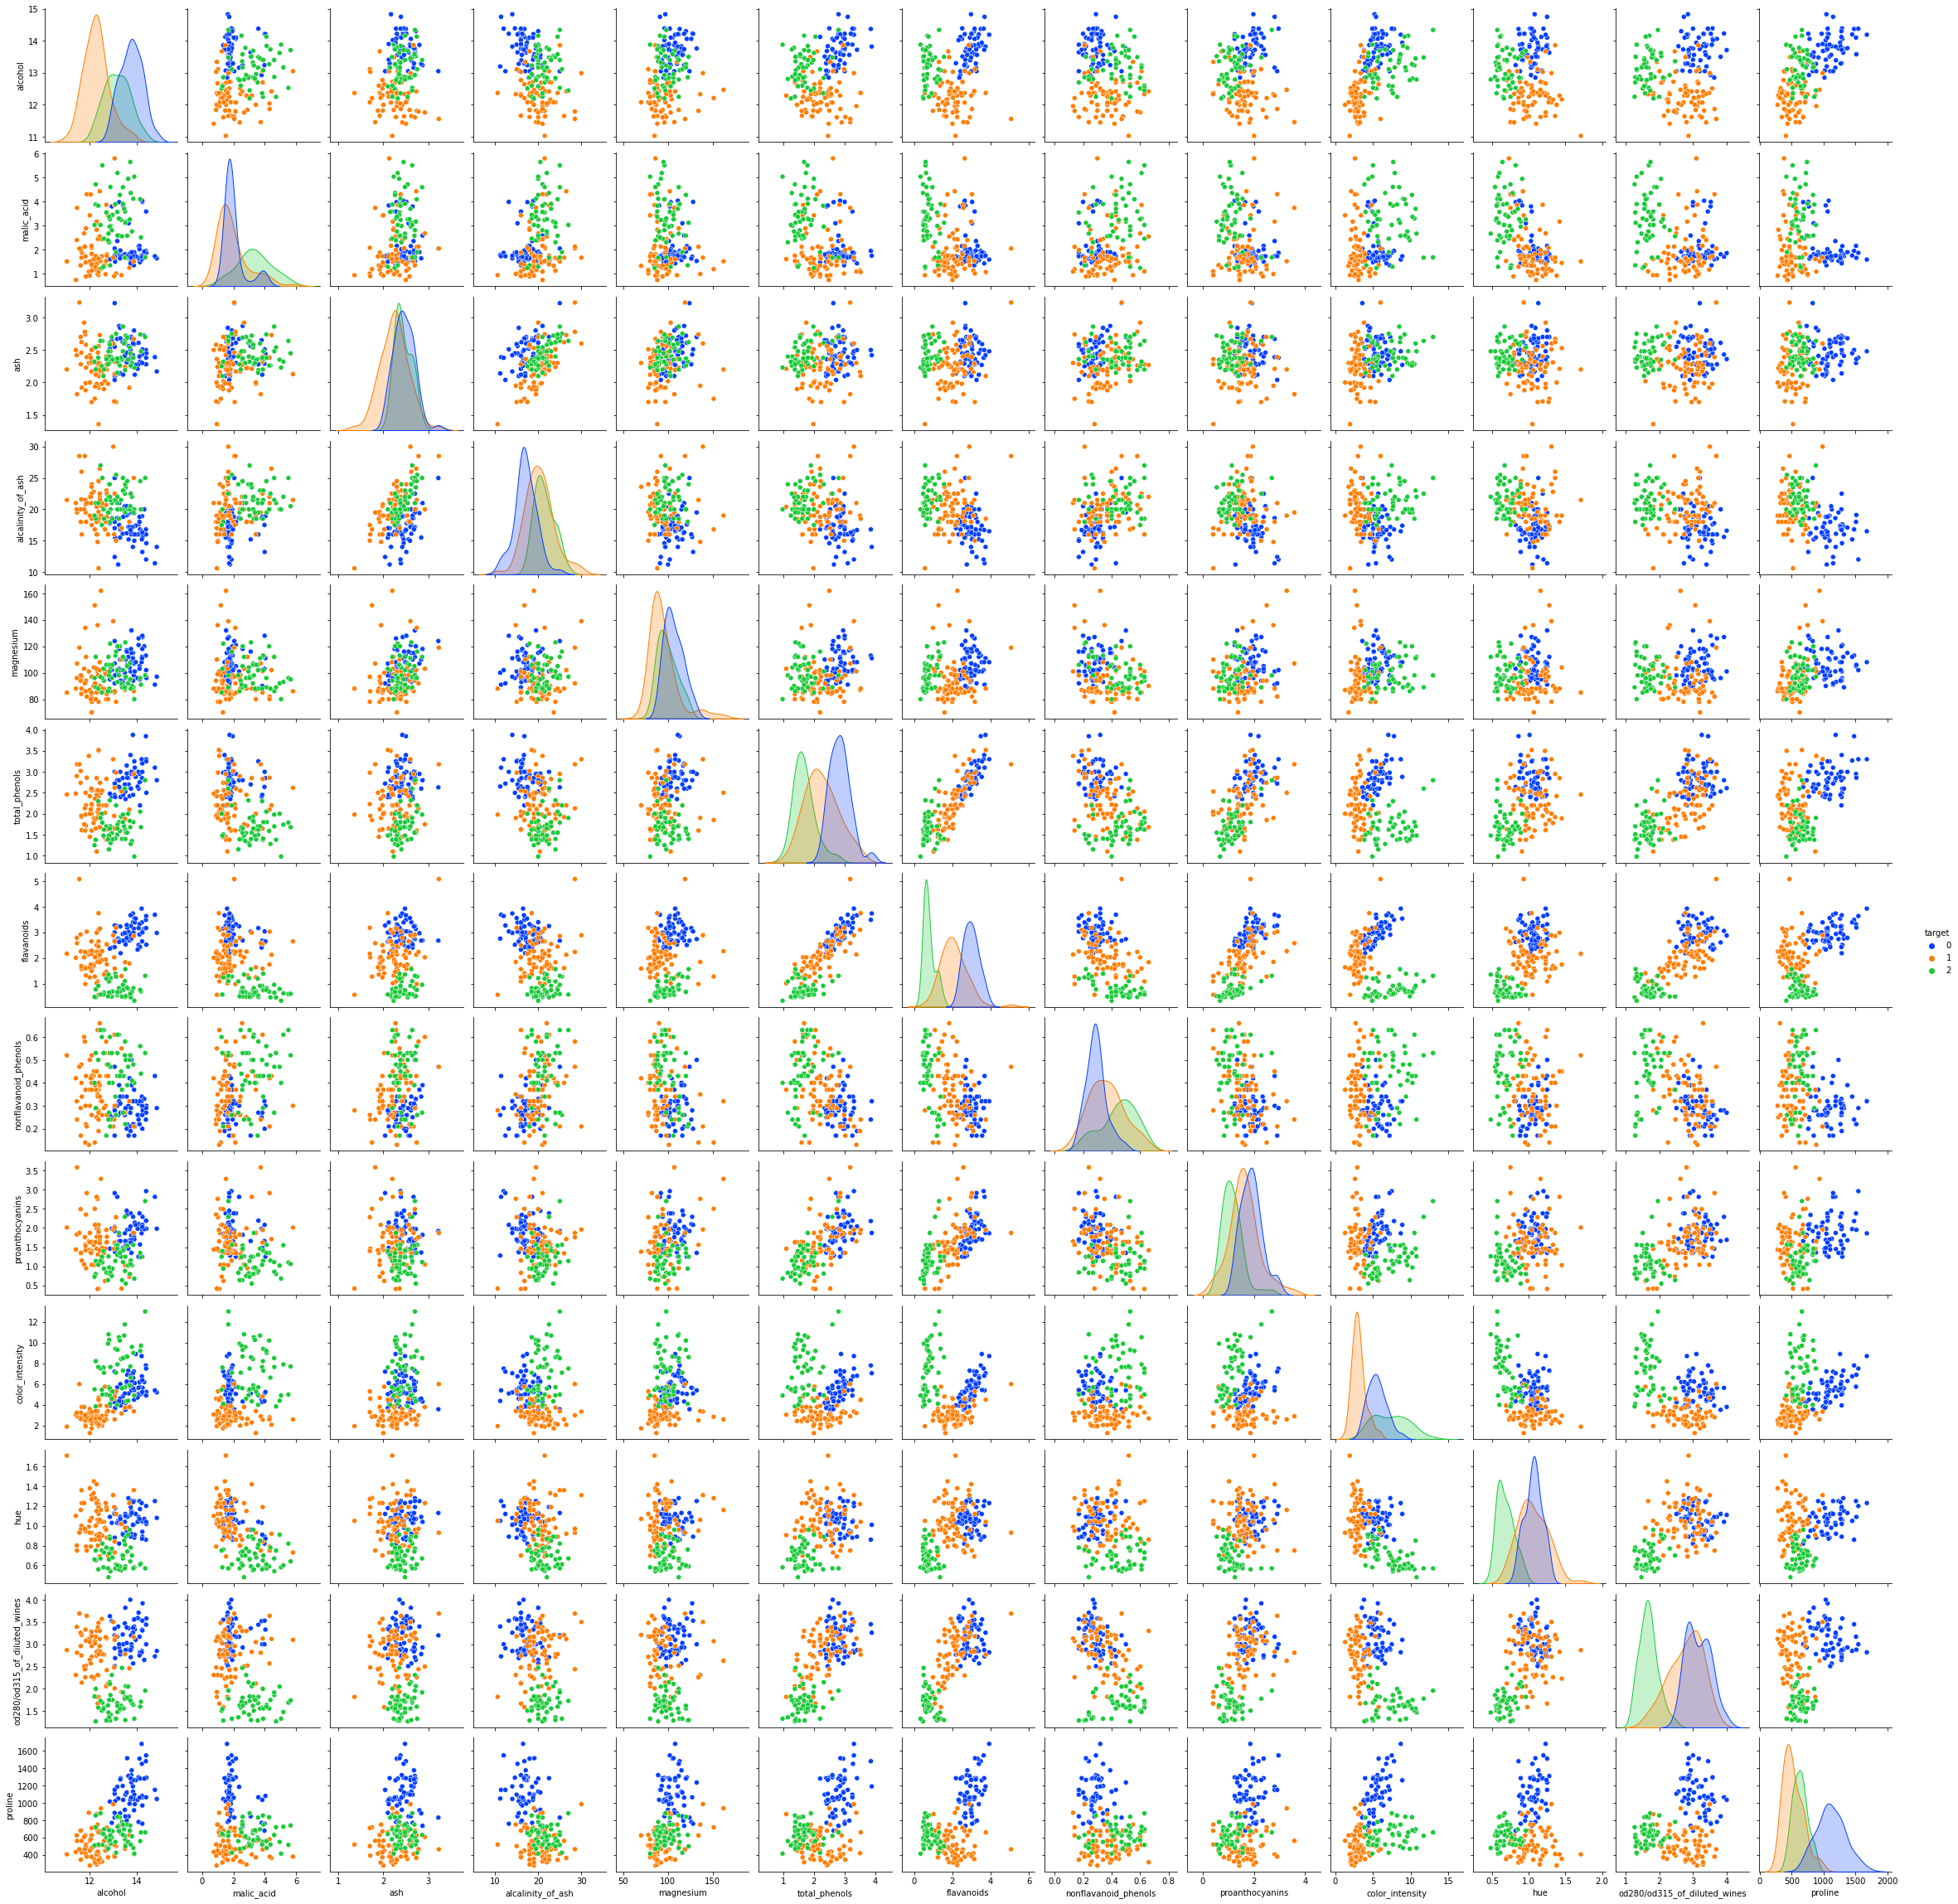

In [2]:
wine_model.pairplot()

While this gives a lot of information of the different correlations in the data, it is difficult to assess manually. It is possible to reduce the number of dimentions by performing Principal Component analysis.

PCA is performed by creating a line through the origin, while maximizing the variance of the point that are projected onto it. 
This has the benefit of giving a simpler space of data to examine while still retaining much of the original information.

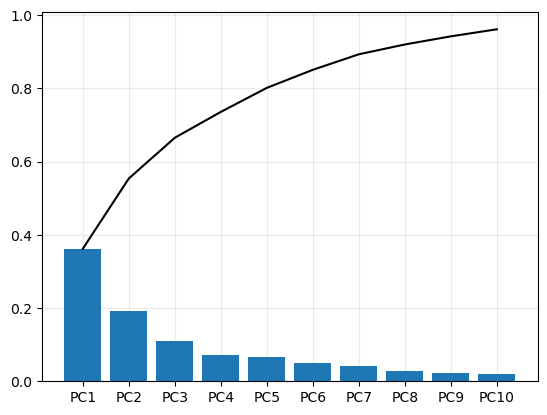

In [3]:
wine_model.perform_PCA()

fig,ax = plt.subplots()
wine_model.scree_plot(ax)

We can use a scree plot (above) to show how much of the original variance is explained. It can be seen that the first three principal components account for around 70% percent of the variance, while the next 7, account for around 25%.

It is possible to asses the transformed points by plotting two principal components against each other. Plotting the scores (transformed points) against each other gives the plot

<AxesSubplot:title={'center':'Score plot'}, xlabel='Principal Component 1', ylabel='Principal Component 2'>

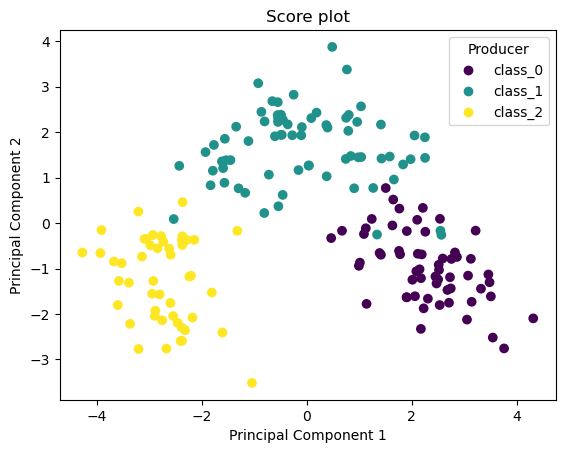

In [4]:
fig, ax = plt.subplots()
wine_model.score_plot(ax)


It can be seen that there is clear clustering of points from the same producers. This is why PCA is sometimes coupled to classification methods such as K-means clustering, classifing the data by assigning points to clusters and iteratively calculating means to improve estimates of cluster centers.

The way the principal components are composed can be shown in a loadings plot. This indicates the different weights the initial features take in the different components.

<AxesSubplot:title={'center':'Loadings plot'}, xlabel='Principal Component 1', ylabel='Principal Component 2'>

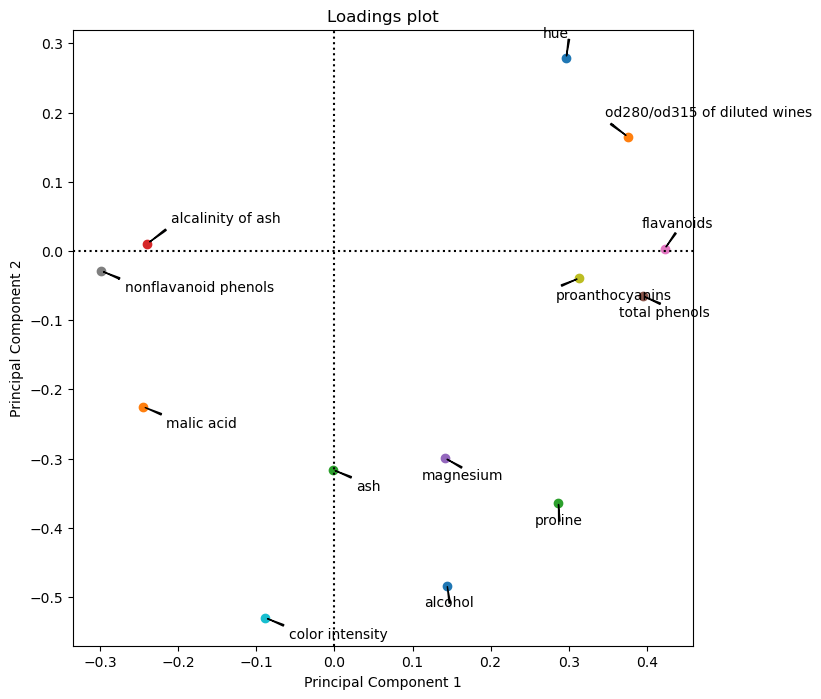

In [5]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
wine_model.plot_loadnings_scatter(ax)

The loadings plot can be interpreted by the relative positions of the loadings. The further away from the axis, the more importance this feature has for the principal component. Here for example the "ash" feature has no weight for the 1st principal component, showing that this feature is not important, while for the second principal component it shows importance. 

If two features are opposite of each other they are negatively correlated, and this shows that these two features contrast each other, such as "malic acid" and the "hue". Further is two features are close to each other, they are positively correlated and may give little additional information to the model that could not have been infered from the associated feature, an example are the "flavanoids" and "total phenols" features.

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
:)


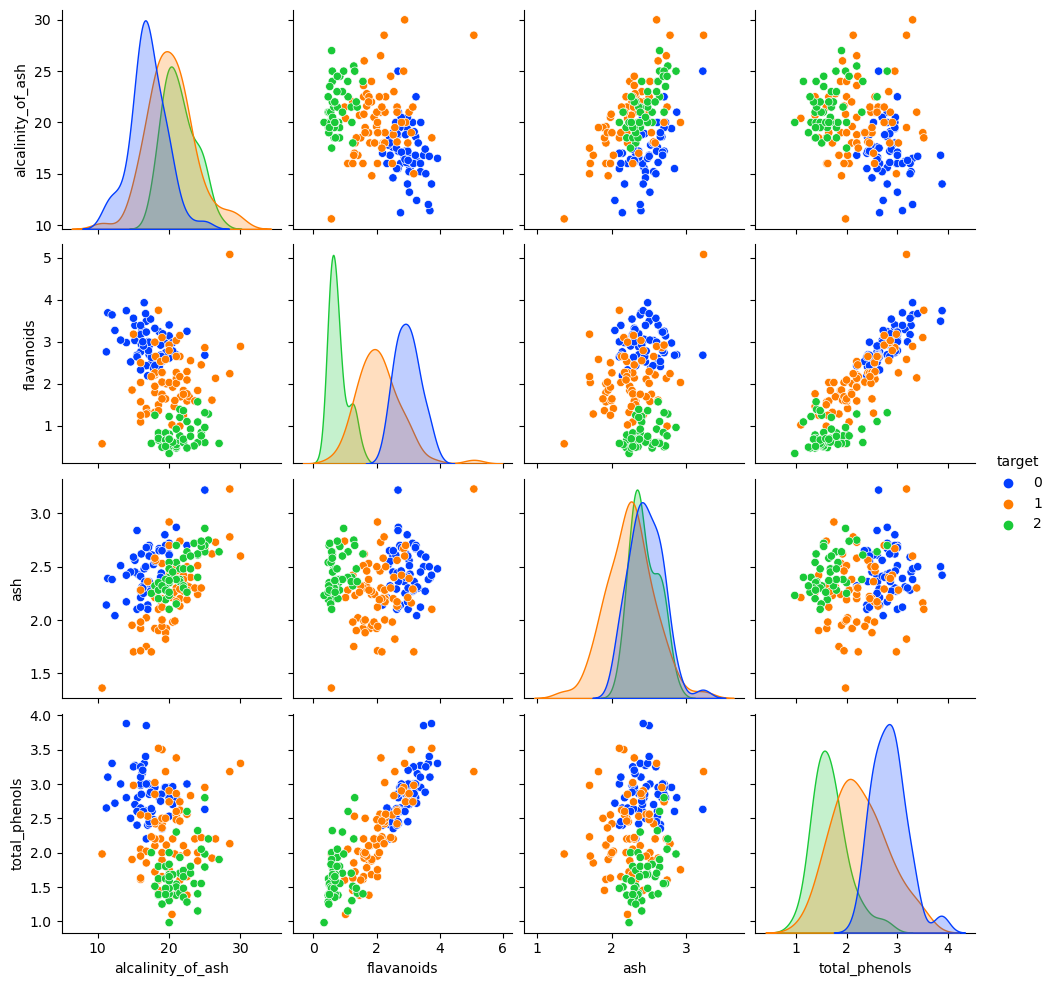

In [6]:
print(wine_model.feature_names)
features = ['alcalinity_of_ash', 'flavanoids', 'ash', 'total_phenols']
wine_model.pairplot(features)

It can be seen that the "ash" seems to have no correlations with the other features whereas  the "total phenols" and "flavanoids" seem positively correlated. This is all captured in PC1. 

It is possible to combine the scores and loadings plots into a biplot. Here some combinations of principal components are plotted against each other with arrows showing the loadings on top of a score plot. 

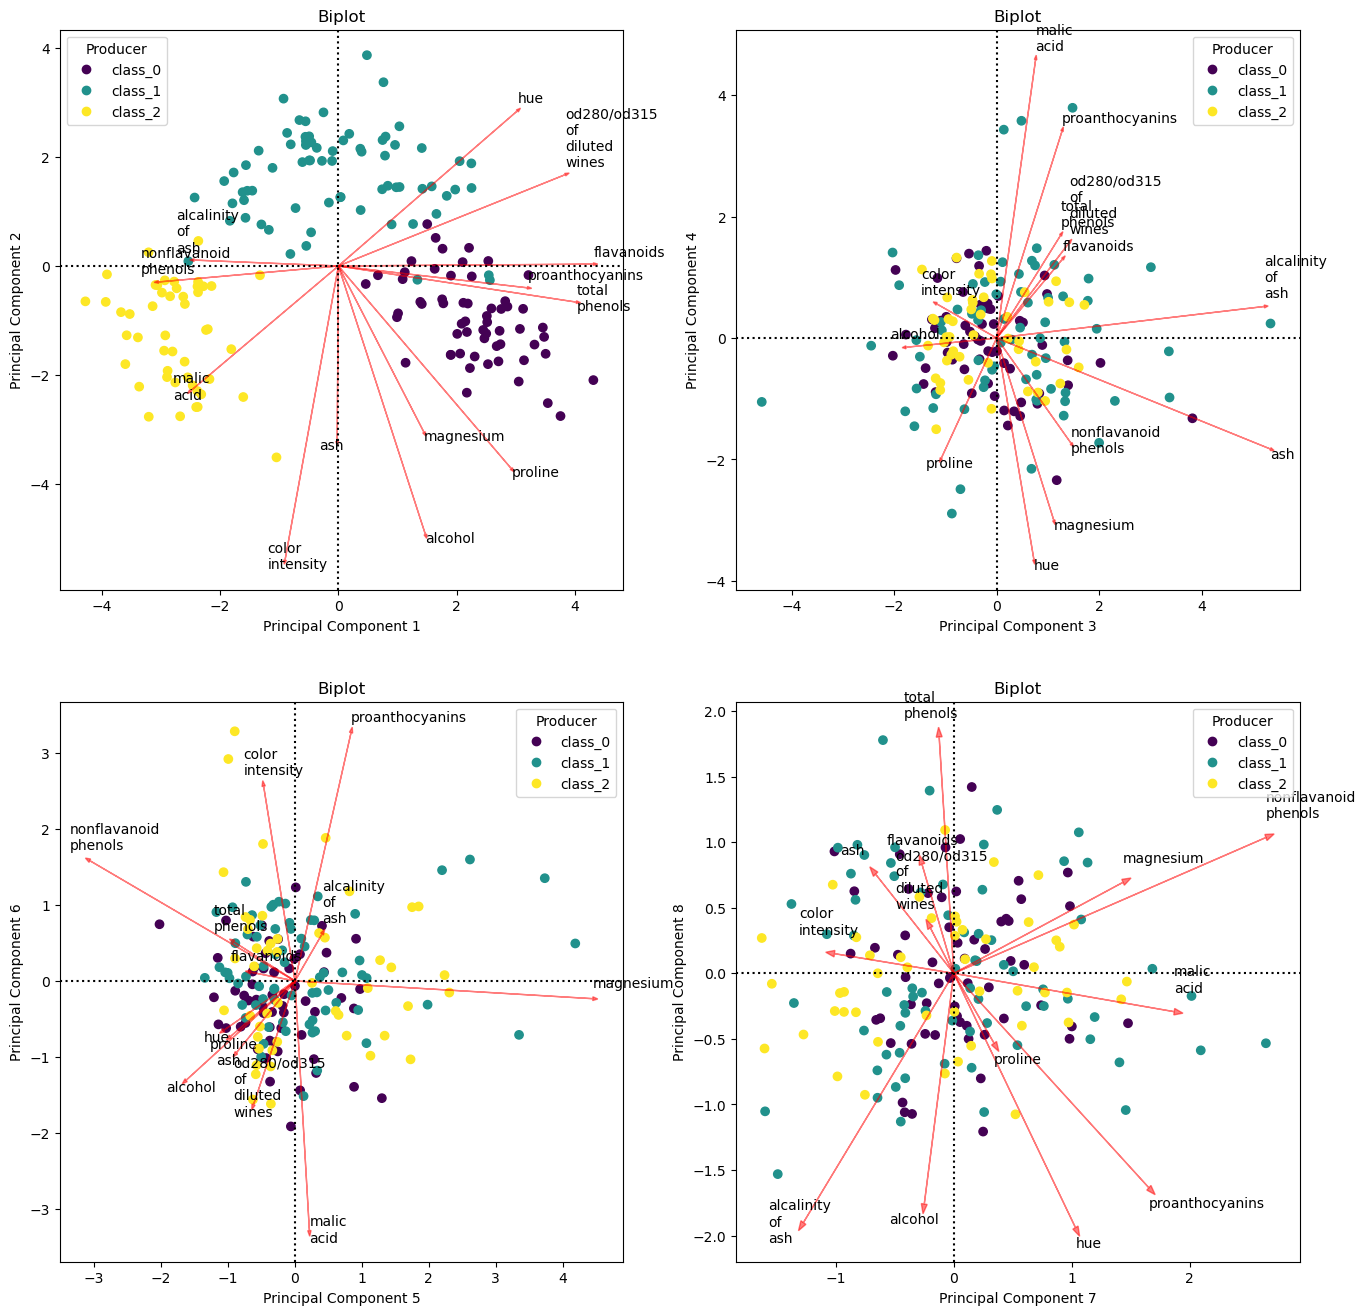

In [7]:
fig, axs = plt.subplots(2,2, figsize=(16,16))
axs = axs.reshape(4,1)
wine_model.biplot(axs[0,0])
wine_model.biplot(axs[1,0], 2,3)
wine_model.biplot(axs[2,0], 4,5)
wine_model.biplot(axs[3,0], 6,7)
plt.show()

The very apparent clustering from the plot comparing PC1 and PC2 is not apparent in the later PCs. This is consistent with less and less of the variance being explained by the higher numbered principal components. 

# Conclusion

The results of the PCA were quite illustrative of the strengths of PCA, and the application of the method did help in describing the data consisely. However it must be seen as a disadvantage that the model required up to 5 PCs to describe 80% of the data, so that the dimention reduction was perhaps not utilized to its full potential in this data set. Other dimention reducing methods may have been able to give similar if not better results due to this.

In all PCA may be considered a useful metric to describe this data. The biplot gives a convenient way of understanding the information being extracted by the PCs and how PCA may later be coupled to other methods, for example in classification is an interesting strength of the method.